In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit_aer import Aer

In [12]:
def teleportation_circuit(state_vector):
    # Create a Quantum Circuit with 3 qubits and 2 classical bits
    circuit = QuantumCircuit(3, 2)

    # Prepare the state to be teleported (|psi>)
    circuit.initialize(state_vector, 0)

    # Create entanglement between qubit 1 and qubit 2
    circuit.h(1)  # Apply Hadamard gate to qubit 1
    circuit.cx(1, 2)  # Apply CNOT gate to entangle qubits 1 and 2

    # Bell measurement
    circuit.cx(0, 1)
    circuit.h(0)
    circuit.measure(0, 0)  # Measure qubit 0
    circuit.measure(1, 1)  # Measure qubit 1

    # Apply corrections based on measurement results
    circuit.x(2).c_if(circuit.clbits[1], 1)  # Apply X gate if the second measurement is 1
    circuit.z(2).c_if(circuit.clbits[0], 1)  # Apply Z gate if the first measurement is 1

    return circuit

In [13]:
# Example state |psi> = 1/sqrt(2) (|0> + |1>)
state_vector = [1/np.sqrt(2), 1/np.sqrt(2)]  # |+> state

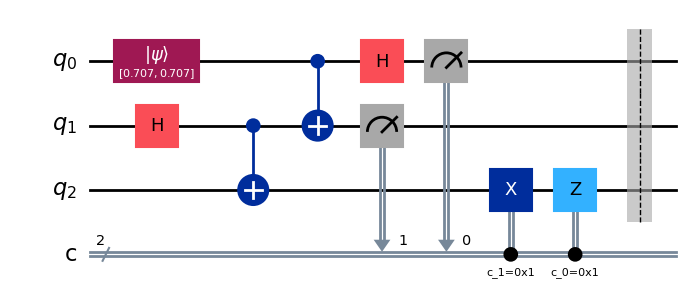

In [14]:
# Create the teleportation circuit
circuit = teleportation_circuit(state_vector)

# Draw the circuit with barriers for visual separation
circuit.barrier()
circuit.draw('mpl')

Output counts: {'01': 267, '00': 244, '10': 266, '11': 247}


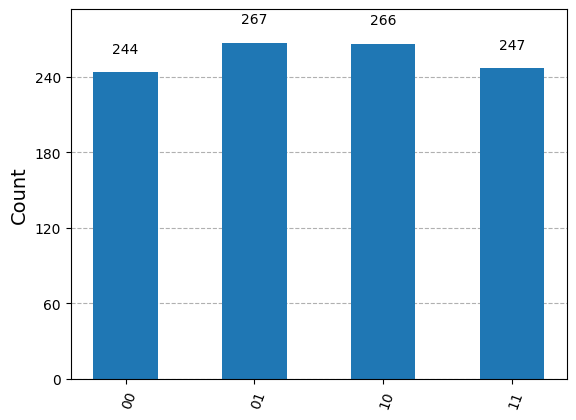

In [19]:
# Step 4: Simulate the circuit using the qasm simulator
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(circuit, shots=1024)
result = job.result()

# Execute the circuit on the qasm simulator
result = simulator.run(circuit, shots=1024).result()

# Get the counts (output)
counts = result.get_counts()

# Print the output counts
print("Output counts:", counts)

# Plot the histogram of results
plot_histogram(counts)